In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')
%pwd

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
import torch

x = torch.rand(10,1)            #rand-> random인수 넣어서 torch만들기
w = torch.rand(100,10)
b = torch.zeros(100, 1)*0.01    #zeros-> 인수 0으로 넣어서 torch만들기

z = torch.matmul(w, x)          #matmul-> 행렬곱
print(z.size())

a = z+b
s = torch.clamp(a, min=2.0)     #clamp(tensor, min, max) tensor의 값들을 min값과 max값으로 상한, 하한 제한을 둔다. 

#print(torch.cat((a,s),1))      #cat(tensor, tensor, dim) tensor와 tensr를 dim차원으로 합친다.

torch.Size([100, 1])


In [ ]:
import numpy as np
import torch

a = np.ones(5)
print(a)

b = torch.from_numpy(a)
print(b)
np.add(a, 1, out=a)

print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
import torch

x = torch.empty(5,3)        #초기화 되지않은 데이터 텐서 만들기
print(x)

x = torch.rand(5,3)
print(x)

x = torch.tensor([5.5, 3])  #데이터로 텐서 만들기
print(x)

x = torch.zeros(5, 3)       #데이터 0으로 초기화
x = torch.ones(5,3)         #데이터 1로 초기화
print(x.size())     

y = torch.rand(5, 3)
print(x+y)

result = torch.empty(5,3)
print(torch.add(x,y, out=result))
print(result)

print(torch.mul(x,y))
print(torch.div(x,y))
print(torch.matmul(x,y.T))

tensor([[-1.4736e-33,  3.0623e-41,  3.3631e-44],
        [ 0.0000e+00,         nan,  0.0000e+00],
        [ 4.4721e+21,  1.5956e+25,  4.7399e+16],
        [ 3.7293e-08,  3.7827e+22,  4.7428e+30],
        [ 1.0333e+18,  3.3270e+27,  1.1093e+27]])
tensor([[0.6819, 0.8538, 0.2933],
        [0.2384, 0.4054, 0.2594],
        [0.6487, 0.0472, 0.3729],
        [0.1053, 0.8858, 0.4513],
        [0.5737, 0.9781, 0.5623]])
tensor([5.5000, 3.0000])
torch.Size([5, 3])
tensor([[1.7123, 1.5967, 1.0775],
        [1.9964, 1.2323, 1.8252],
        [1.9851, 1.7363, 1.0200],
        [1.9789, 1.9229, 1.7603],
        [1.2660, 1.5179, 1.3430]])
tensor([[1.7123, 1.5967, 1.0775],
        [1.9964, 1.2323, 1.8252],
        [1.9851, 1.7363, 1.0200],
        [1.9789, 1.9229, 1.7603],
        [1.2660, 1.5179, 1.3430]])
tensor([[1.7123, 1.5967, 1.0775],
        [1.9964, 1.2323, 1.8252],
        [1.9851, 1.7363, 1.0200],
        [1.9789, 1.9229, 1.7603],
        [1.2660, 1.5179, 1.3430]])
tensor([[0.7123, 0.5967, 0

In [ ]:
import time
import torch

a = torch.rand(10000,10000)
b = torch.rand(10000,10000)
start_time = time.process_time()
a.matmul(b)
print(time.process_time()-start_time)

a = a.to("cuda")
b = a.to("cuda")
start_time = time.process_time()
a.matmul(b)
print(time.process_time()-start_time)

a = a.to("cpu")
b = a.to("cpu")
start_time = time.process_time()
a.matmul(b)
print(time.process_time()-start_time)

26.927316840999996
0.03591018899999909
26.830653407


In [ ]:
import numpy as np
import torch

a = np.random.rand(3,3,5)
a_torch = torch.from_numpy(a)

print(a_torch.size())
a_torch = a_torch.view(-1,3)
print(a_torch.size())
a_torch = a_torch.view(3,5,3)
print(a_torch.size())

torch.Size([3, 3, 5])
torch.Size([15, 3])
torch.Size([3, 5, 3])


In [ ]:
import numpy as np

x_np = np.random.rand(3,256,256)
#print(np.median(x_np, axis=2))

# Linear regression

## make by userself

#### step1: preparre dataset


In [ ]:
######### Pytorch version #########
import numpy as np
import torch

x_data = [3.57, 5.59, 5.82, 8.19, 5.63, 4.89, 3.39, 2.18, 4.84, 6.04, 6.84]
y_data = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

x_tensor = torch.tensor(x_data)
y_tensor = torch.tensor(y_data)

#### step2: Implement foward/basckward propagation, computing loss functions for linear regression model.


*   model: Y = w*x + b
*   Loss: mean squared error




In [ ]:
######### Pytorch version #########
def forward_prop(x, w, b):
    return torch.mul(x,w).add(b)        # H(x) = XW+b

def compute_cost(predic_y, y):
    return torch.sub(predic_y, y).pow(2).mean()     #cost = average [ (predic_y-y)^2 ]

def dloss_fn(predic_y, y):
    return torch.sub(predic_y, y).div(predic_y.size(0)).mul(2)  #cost함수 미분

def backward_prop(x, y, predic_y, w, b):
    d_loss = dloss_fn(predic_y, y)
    dw = torch.mul(d_loss, x)
    db = torch.mul(d_loss, torch.tensor(1.0))
    return torch.stack([dw.mean(), db.mean()])

#### step3: build a linear regression model for training


In [ ]:
######### Pytorch version #########
def training_loop(n_epochs, learning_rate, params, x, y):
    for epoch in range(1, n_epochs+1):
        w, b = params
        predic_y = forward_prop(x, w, b)    #y = XW+b
        loss = compute_cost(predic_y, y)    #loss = average[(predic_y-y)^2]
        grad = backward_prop(x, y, predic_y, w, b)  #Gradient Descent
        params = torch.sub(params, torch.mul(learning_rate, grad))  #update
        if epoch % 100 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

#### step4: Run the following code to test your model

In [ ]:
######### Pytorch version #########
params = training_loop(
    n_epochs= 1000,
    learning_rate = 0.1,
    params = torch.tensor([1.0, 0.0]),
    x = x_tensor,
    y = y_tensor
)

Epoch 100, Loss 22.746508
Epoch 200, Loss 17.476759
Epoch 300, Loss 13.608207
Epoch 400, Loss 10.768286
Epoch 500, Loss 8.683494
Epoch 600, Loss 7.153036
Epoch 700, Loss 6.029520
Epoch 800, Loss 5.204746
Epoch 900, Loss 4.599278
Epoch 1000, Loss 4.154793


#### step5(optional): after training, you can plot the results by using the following code.

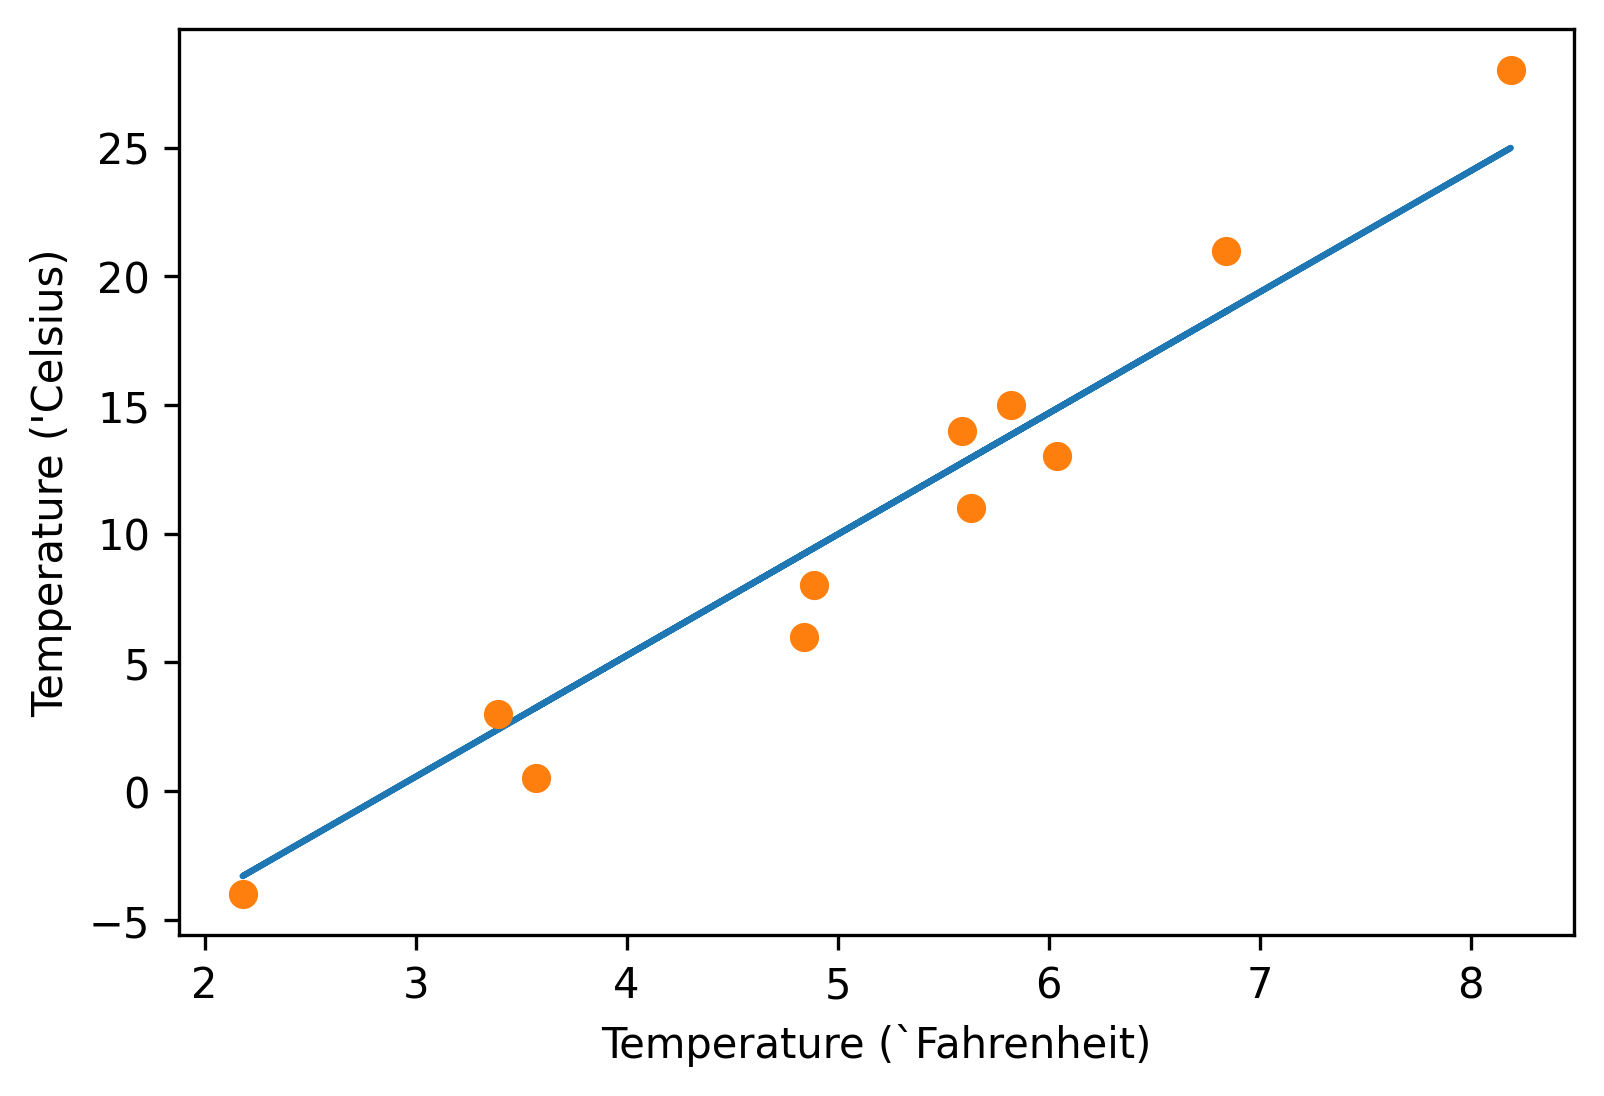

In [ ]:
from matplotlib import pyplot as plt

predic_y = forward_prop(x_tensor, *params)

fig = plt.figure(dpi=300)
plt.xlabel("Temperature (`Fahrenheit)")
plt.ylabel("Temperature ('Celsius)")
plt.plot(x_tensor.numpy(), predic_y.detach().numpy())
plt.plot(x_tensor.numpy(), y_tensor.numpy(), 'o')
plt.savefig("temp_unknow_plot.png", format="png")

## use nn Module

### step1: Module inport

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)
x_train = torch.FloatTensor([[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

### step2: make model

In [ ]:
def training_loop(n_epochs, learning_rate, x, y ):
    model = nn.Linear(x.size(dim=1),y.size(dim=1))                       #선형 모델 만들기 input_dim, output_dim
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)    #optimzer 설정: 경사하강법 SGD를 사용하고, learning rate = 0.01로 설정  
    for epoch in range(n_epochs+1):
        prediction = model(x)                       #H(x)계산
        cost = F.mse_loss(prediction, y)            #cost 계산, 평균 제곱 오차 함수

        optimizer.zero_grad()                       #gradient를 0으로 초기화
        cost.backward()                             #비용함수를 미분해 gradient계산
        optimizer.step()                            #W, b업데이트

        if epoch % 100 == 0:
            print('Epoc {:4d}/{} Cost: {:.6f}'.format(epoch, n_epochs, cost.item()))
    return model

### step3: check train result

In [ ]:
parms = training_loop(2000, 1e-6, x_train, y_train)
w, b = parms.parameters()
predic_y = (torch.mul(x_train, w)+b).sum(dim=1).reshape(y_train.size(dim=0),y_train.size(dim=1))
print("Predic values: {}".format(predic_y.detach().numpy()))

new_var = torch.FloatTensor([[83, 70, 75]])
pred_y = parms(new_var)
print("new_pred: {}".format(pred_y))

Epoc    0/2000 Cost: 24821.373047
Epoc  100/2000 Cost: 3.927335
Epoc  200/2000 Cost: 0.869267
Epoc  300/2000 Cost: 0.866388
Epoc  400/2000 Cost: 0.863882
Epoc  500/2000 Cost: 0.861399
Epoc  600/2000 Cost: 0.858922
Epoc  700/2000 Cost: 0.856453
Epoc  800/2000 Cost: 0.854002
Epoc  900/2000 Cost: 0.851565
Epoc 1000/2000 Cost: 0.849144
Epoc 1100/2000 Cost: 0.846734
Epoc 1200/2000 Cost: 0.844330
Epoc 1300/2000 Cost: 0.841974
Epoc 1400/2000 Cost: 0.839588
Epoc 1500/2000 Cost: 0.837230
Epoc 1600/2000 Cost: 0.834883
Epoc 1700/2000 Cost: 0.832538
Epoc 1800/2000 Cost: 0.830192
Epoc 1900/2000 Cost: 0.827885
Epoc 2000/2000 Cost: 0.825597
Predic values: [[152.05571]
 [184.28697]
 [180.75862]
 [197.15579]
 [140.70618]]
new_pred: tensor([[153.6384]], grad_fn=<AddmmBackward0>)


## make to class

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LinearRegressionModel(nn.Module):
    def __init__(self, in_data, out_data):
        super().__init__()
        torch.manual_seed(1)
        self.x = in_data
        self.y = out_data
        self.linear = nn.Linear(in_data.size(dim=1), out_data.size(dim=1))
    def train(self, n_epochs, learning_rate):
        optimizer = torch.optim.SGD(self.linear.parameters(), lr=learning_rate)
        for epoch in range(n_epochs+1):
            prediction = self.linear(self.x)
            cost = F.mse_loss(prediction, self.y)

            optimizer.zero_grad()
            cost.backward()
            optimizer.step()

            if epoch % 100 == 0:
                print('Epoch {:4d}/{}: {:.6f}'.format(epoch, n_epochs, cost.item()))
    def getResult(self):
        return self.linear.parameters()

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
model = LinearRegressionModel(x_train, y_train)
model.train(2000, 1e-6)
w, b = model.getResult()

Epoch    0/2000: 31667.597656
Epoch  100/2000: 4.126944
Epoch  200/2000: 0.228212
Epoch  300/2000: 0.227511
Epoch  400/2000: 0.227292
Epoch  500/2000: 0.227070
Epoch  600/2000: 0.226853
Epoch  700/2000: 0.226636
Epoch  800/2000: 0.226425
Epoch  900/2000: 0.226210
Epoch 1000/2000: 0.225998
Epoch 1100/2000: 0.225779
Epoch 1200/2000: 0.225567
Epoch 1300/2000: 0.225357
Epoch 1400/2000: 0.225142
Epoch 1500/2000: 0.224932
Epoch 1600/2000: 0.224725
Epoch 1700/2000: 0.224512
Epoch 1800/2000: 0.224305
Epoch 1900/2000: 0.224098
Epoch 2000/2000: 0.223896


# Mini Batch and Data Load

## Use Dataset

### step1: Define dataset

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train = torch.FloatTex_train = torch.FloatTensor([[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

dataset = TensorDataset(x_train, y_train)   #dataset 정의

### Step2: make model

In [ ]:
from math import e
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x, y = samples
        prediction = model(x)
        cost = F.mse_loss(prediction, y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()))

### Step3: check train result

In [ ]:
new_var = torch.FloatTensor([[53, 80, 93]])
pred_y = model(new_var)
print(pred_y)

tensor([[157.0532]], grad_fn=<AddmmBackward0>)


## Use Custom Dataset

### step1: define coustom dataset

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    def __len__(self):
        return len(self.x_data)
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

### Step2~Step3: same with using basic dataset

In [ ]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x, y = samples
        prediction = model(x)
        cost = F.mse_loss(prediction, y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()))


Epoch    0/20 Batch 1/3 Cost: 45528.679688
Epoch    0/20 Batch 2/3 Cost: 8054.782715
Epoch    0/20 Batch 3/3 Cost: 1720.309692
Epoch    1/20 Batch 1/3 Cost: 1381.784790
Epoch    1/20 Batch 2/3 Cost: 374.581909
Epoch    1/20 Batch 3/3 Cost: 250.572052
Epoch    2/20 Batch 1/3 Cost: 33.470726
Epoch    2/20 Batch 2/3 Cost: 8.316851
Epoch    2/20 Batch 3/3 Cost: 1.700498
Epoch    3/20 Batch 1/3 Cost: 2.234921
Epoch    3/20 Batch 2/3 Cost: 1.014363
Epoch    3/20 Batch 3/3 Cost: 0.911358
Epoch    4/20 Batch 1/3 Cost: 1.116976
Epoch    4/20 Batch 2/3 Cost: 0.685948
Epoch    4/20 Batch 3/3 Cost: 0.013399
Epoch    5/20 Batch 1/3 Cost: 0.682925
Epoch    5/20 Batch 2/3 Cost: 0.887559
Epoch    5/20 Batch 3/3 Cost: 0.604714
Epoch    6/20 Batch 1/3 Cost: 0.253834
Epoch    6/20 Batch 2/3 Cost: 0.691180
Epoch    6/20 Batch 3/3 Cost: 1.308380
Epoch    7/20 Batch 1/3 Cost: 0.664054
Epoch    7/20 Batch 2/3 Cost: 0.933043
Epoch    7/20 Batch 3/3 Cost: 0.294103
Epoch    8/20 Batch 1/3 Cost: 0.080270
Epoch  

# logistic Regression



## Hypothesis

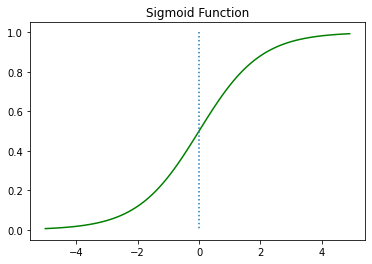

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

## make by userself


### basic inform

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

hypothesis = 1/(1 + torch.exp(-(x_train.matmul(W)+b)))
print(hypothesis)
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis)

F.binary_cross_entropy(hypothesis, y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

### make it

In [ ]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

#모델 초기화
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#optimizer 설정
optimizer = optim.SGD([W, b], lr=1)


nb_epochs = 1000
for epoch in range(nb_epochs+1):
    #cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W)+b)
    cost = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis)).mean() #F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100 == 0:
        print('Epoch {:4d}/{}, Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000, Cost: 0.693147
Epoch  100/1000, Cost: 0.134722
Epoch  200/1000, Cost: 0.080643
Epoch  300/1000, Cost: 0.057900
Epoch  400/1000, Cost: 0.045300
Epoch  500/1000, Cost: 0.037261
Epoch  600/1000, Cost: 0.031673
Epoch  700/1000, Cost: 0.027556
Epoch  800/1000, Cost: 0.024394
Epoch  900/1000, Cost: 0.021888
Epoch 1000/1000, Cost: 0.019852


### test

In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis)
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


### use nn.Module

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = nn.Sequential(nn.Linear(2,1), nn.Sigmoid())
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
    hypothesis = model(x_train)
    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100==0:
        prediction = hypothesis >= torch.FloatTensor([0.5])                     #예측값이 0.5 이상이면True
        correct_prediction = prediction.float() == y_train                      #실제값과 일치하는 경우에만 True
        accuracy = correct_prediction.sum().item() / len(correct_prediction)    #정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(epoch, nb_epochs, cost.item(), accuracy * 100))

model(x_train)

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00%
Epoch  300/1000 Cost: 0.057820 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045251 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037228 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031649 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027538 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024381 Accuracy 100.00%
Epoch  900/1000 Cost: 0.021877 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019843 Accuracy 100.00%


tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

# Softmax Regression


In [ ]:
import torch
import torch.nn.functional as F

torch.manual_seed(1)

## low-level softmax's cost function

In [ ]:
z = torch.FloatTensor([1, 2, 3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)
hypothesis.sum()

tensor([0.0900, 0.2447, 0.6652])


tensor(1.)

In [ ]:
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

y = torch.randint(5, (3,)).long()
print(y)

y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)        #y.unsqueeze(1) -> (1x3) -> (3x1)

print(y_one_hot)

cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)
tensor([0, 2, 1])
tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])
tensor(1.4689, grad_fn=<MeanBackward0>)


## high-level softmax's cost function

In [ ]:
F.log_softmax(z, dim=1)         #F.softmax() + torch.log() = F.log_softmax()
cost = (y_one_hot * -F.log_softmax(z, dim=1)).sum(dim=1).mean()
print(cost)
cost = F.nll_loss(F.log_softmax(z,dim=1), y)
print(cost)
cost = F.cross_entropy(z, y)
print(cost)

tensor(1.4497, grad_fn=<MeanBackward0>)
tensor(1.4497, grad_fn=<NllLossBackward0>)
tensor(1.4497, grad_fn=<NllLossBackward0>)


## make low-level softmax regression

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
x_train = torch.FloatTensor([[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

print(x_train.shape)
print(y_train.shape)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 4])
torch.Size([8])
torch.Size([8, 3])


In [ ]:
w = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([w,b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs):
    hypothesis = F.softmax(x_train.matmul(w)+b, dim=1)
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507


## make high-level softmax regression


In [ ]:
w = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([w, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs):
    
   z = x_train.matmul(w)+b
   cost = F.cross_entropy(z, y_train)

   optimizer.zero_grad()
   cost.backward()
   optimizer.step()

   if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507


## make softmax regression by nn.module

In [ ]:
model = nn.Linear(4, 3)

optimizer = optim.SGD(model.parameters(), lr=0.1)
nb_epochs = 1000
for epoch in range(nb_epochs):
    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 2.839122
Epoch  100/1000 Cost: 0.711753
Epoch  200/1000 Cost: 0.628132
Epoch  300/1000 Cost: 0.571281
Epoch  400/1000 Cost: 0.521554
Epoch  500/1000 Cost: 0.474550
Epoch  600/1000 Cost: 0.428675
Epoch  700/1000 Cost: 0.383189
Epoch  800/1000 Cost: 0.337776
Epoch  900/1000 Cost: 0.292793


## MNIST data classfication


link: http://yann.lecun.com/exdb/mnist
1.   MNIST data란



> 0~9까지의 이미지로 구성된 손글씨 데이터. 과거 우체국에서 편지의 우편 번호를 인식하기 위해서 만들어진 훈련 데이터. 


    


2.   28 pixel x 28 pixel 이미지 


> 28 x 28 = 784 pixel 이므로 각 이미지를 총 784의 원소를 가진 벡터로 만들어서 계산. 
  784개의 특성을 가진 샘플이 된다. 


3.   torchvision 소개


> 유명한 데이터 셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지이다 자연어 처리를 위해서는 torchtext가 있다. 
링크:http://pytorch.org/docs/stable/torchvision/index.html




### 분류기 구현을 위한 사전 설정

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader 
import torch.nn as nn
import matplotlib.pyplot as plt
import random

USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

True
다음 기기로 학습합니다: cuda


In [ ]:
#for reproducibility 
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

#hyperparameters
training_epochs = 15
batch_size = 100

### MNIST 분류기 구현

In [ ]:
# mnist dataset
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw





> root는 MNIST 데이터를 다운받을 경로, train은 true면 훈련 데이터를 리턴, false면 테스트 데이터를 리턴받음. transform은 현재 데이터를 파이토치 텐서로 변환해준다. download는 해당 견로에 mnist데이터가 없으면 다운로드 받겠다라는 의미.



In [ ]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)



> dataset은 로드할 대상을 의미. 두 번째 인자인 batch_size는 배치 크기, shuffle은 매 에포크마다 미니 배치를 셔플할 것인지 여부, drop_last는 마지막 배치를 버릴 것인지 확인.




> drop_last를 하는 이유는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아주기 때문이다. 








In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)   #to(): 연산 수행 위치 결정. 
# cost function & optimizer
criterion = nn.CrossEntropyLoss().to(device)        #nn.functional.cross_entropy() == nn.CrosssEntropyLoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
for epoch in range(training_epochs):    # training_epochs = 15
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        #배치 크기가 100이므로, 아래의 연산에서 x는 (100, 784) 텐서
        X = X.view(-1, 28*28).to(device)
        #레이블은 0~9의 정수
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
    print('Epoch: ', '%04d'% (epoch+1), 'cost=', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch:  0001 cost= 0.359200507
Epoch:  0002 cost= 0.331210256
Epoch:  0003 cost= 0.316642910
Epoch:  0004 cost= 0.306912154
Epoch:  0005 cost= 0.300341666
Epoch:  0006 cost= 0.295203745
Epoch:  0007 cost= 0.290808439
Epoch:  0008 cost= 0.287419200
Epoch:  0009 cost= 0.284378767
Epoch:  0010 cost= 0.281997502
Epoch:  0011 cost= 0.279780537
Epoch:  0012 cost= 0.277854115
Epoch:  0013 cost= 0.276023179
Epoch:  0014 cost= 0.274494946
Epoch:  0015 cost= 0.272993058
Learning finished


Accuracy: 0.8873999714851379
Label:  5
Prediction:  5


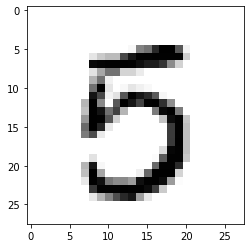

In [ ]:
# 테스트 데이터를 사용해 모델 테스트
with torch.no_grad(): #torch.no_grad()를 하면 grdient 계산을 수행 안한다. 
    X_test = mnist_test.data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # mnist 테스트 데이터에서 무작위로 하나를 뽑아서 예측
    r = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.targets[r:r+1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    plt.imshow(mnist_test.data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()